In [5]:
from google.colab import files
uploaded = files.upload()

Saving jcpenney_reviewers.json to jcpenney_reviewers.json


In [6]:
# First, import the pandas library
import pandas as pd

# --- 1. Load the CSV files ---
products_df = pd.read_csv('products.csv')
reviews_df = pd.read_csv('reviews.csv')
users_df = pd.read_csv('users.csv')

# --- 2. Check the 'products_df' ---
print("\n--- Products DataFrame: Info (.info()) ---")
products_df.info()
print("\n===================================================\n") # Just a separator

# --- 3. Check the 'reviews_df' ---
print("\n--- Reviews DataFrame: Info (.info()) ---")
reviews_df.info()
print("\n===================================================\n") # Just a separator

# --- 4. Check the 'users_df' ---
print("\n--- Users DataFrame: Info (.info()) ---")
users_df.info()


--- Products DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB



--- Reviews DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB



--- Users DataFrame: Info 

In [7]:
# --- 1. Load the JSON files (Fixed) ---
# We add lines=True because each line in the file is a separate JSON object.

try:
    products_json_df = pd.read_json('jcpenney_products.json', lines=True)
    reviewers_json_df = pd.read_json('jcpenney_reviewers.json', lines=True)

    # --- 2. Check the 'products_json_df' ---
    print("\n--- JSON Products DataFrame: Info (.info()) ---")
    products_json_df.info()
    print("\n===================================================\n") # Separator

    # --- 3. Check the 'reviewers_json_df' ---
    print("\n--- JSON Reviewers DataFrame: Info (.info()) ---")
    reviewers_json_df.info()

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\n>>> Please make sure you have uploaded both 'jcpenney_products.json' and 'jcpenney_reviewers.json' to Colab!")
except Exception as e:
    print(f"An error occurred: {e}")


--- JSON Products DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7982 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7982 non-null   object 
 4   list_price              7982 non-null   object 
 5   sale_price              7982 non-null   object 
 6   category                7982 non-null   object 
 7   category_tree           7982 non-null   object 
 8   average_product_rating  7982 non-null   float64
 9   product_url             7982 non-null   object 
 10  product_image_urls      7982 non-null   object 
 11  brand                   7982 non-null   object 
 12  total_number_reviews    7982 non-null   int64  
 13  Reviews                 7982 non-null   obje

**Merge Product Data**

I have my product information split across two different files: products_df (from the CSV) and products_json_df (from the JSON).

Looking at them, I can see one file has some info (like Price and Av_Score), while the other has different, important details (like category, brand, and sale_price). To analyze all these features together, I need to combine them into a single "master" table.

To do this, I will merge them using their product ID. There's just one small fix I need to make first:

*   In products_df, the ID is called Uniq_id.
*   In products_json_df, it's called uniq_id.

Since the names must match exactly for a merge to work, my first step is to rename both of these columns to product_id. After that, I can easily join the tables. Then, I will check the .info() to make sure all the columns from both files are in my new products_master_df table.

In [8]:
# --- 1. Rename the ID columns so they match ---
# So that both 'Uniq_id' (CSV) aur 'uniq_id' (JSON) become 'product_id'

try:
    products_df.rename(columns={'Uniq_id': 'product_id'}, inplace=True)
    products_json_df.rename(columns={'uniq_id': 'product_id'}, inplace=True)

    # --- 2. Now, merge the two DataFrames on the common 'product_id' ---
    products_master_df = pd.merge(products_df, products_json_df, on='product_id')

    # --- 3. Check the new combined DataFrame ---
    print("--- Master Products DataFrame: Info (.info()) ---")
    products_master_df.info()

except KeyError:
    print("Error: 'Uniq_id' or 'uniq_id' column not found. Maybe it was already renamed?")
except Exception as e:
    print(f"An error occurred: {e}")

--- Master Products DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              7982 non-null   object 
 1   SKU                     7915 non-null   object 
 2   Name                    7982 non-null   object 
 3   Description             7439 non-null   object 
 4   Price                   5816 non-null   float64
 5   Av_Score                7982 non-null   float64
 6   sku                     7982 non-null   object 
 7   name_title              7982 non-null   object 
 8   description             7982 non-null   object 
 9   list_price              7982 non-null   object 
 10  sale_price              7982 non-null   object 
 11  category                7982 non-null   object 
 12  category_tree           7982 non-null   object 
 13  average_product_rating  7982 non-null   flo

**Merge User Data**

Next, I will combine my two user files: users_df (from the CSV) and reviewers_json_df (from the JSON). Just like with the product files, these two files have related information, and I want them in one main table.

My first step is to rename the Username column to user_id in both tables. Once the key column name matches, I can easily merge them into a new users_master_df. This will give me a single table with all user information, including their State (location).

In [9]:
# --- 1. Rename the 'Username' column to 'user_id' in both tables ---

try:
    users_df.rename(columns={'Username': 'user_id'}, inplace=True)
    reviewers_json_df.rename(columns={'Username': 'user_id'}, inplace=True)

    # --- 2. Merge the two user DataFrames on 'user_id' ---
    # I use an 'outer' merge just in case one list has users the other doesn't
    # (though in my case, they look identical)
    users_master_df = pd.merge(users_df, reviewers_json_df, on='user_id')

    # --- 3. Check the new combined DataFrame ---
    print("--- Master Users DataFrame: Info (.info()) ---")
    users_master_df.info()

    print("\n--- Master Users DataFrame: First 5 Rows (.head()) ---")
    print(users_master_df.head())

except KeyError:
    print("Error: 'Username' column not found. Maybe it was already renamed?")
except Exception as e:
    print(f"An error occurred: {e}")

--- Master Users DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   5002 non-null   object
 1   DOB_x     5002 non-null   object
 2   State_x   5002 non-null   object
 3   DOB_y     5002 non-null   object
 4   State_y   5002 non-null   object
 5   Reviewed  5002 non-null   object
dtypes: object(6)
memory usage: 234.6+ KB

--- Master Users DataFrame: First 5 Rows (.head()) ---
    user_id       DOB_x        State_x       DOB_y        State_y  \
0  bkpn1412  31.07.1983         Oregon  31.07.1983         Oregon   
1  gqjs4414  27.07.1998  Massachusetts  27.07.1998  Massachusetts   
2  eehe1434  08.08.1950          Idaho  08.08.1950          Idaho   
3  hkxj1334  03.08.1969        Florida  03.08.1969        Florida   
4  jjbd1412  26.07.2001        Georgia  26.07.2001        Georgia   

                              

**Create the Final Master DataFrame**

This is the most important step. I am now going to combine all our hard work into one single, powerful DataFrame called master_df. This table will contain everything: the product details, the review text and score, and the user's location.

My plan is a two-step merge:

*   First, I will connect reviews to products.
*   Then, I will add the user data to that combined table.

Just like before, I have a small column name mismatch. My reviews_df (from reviews.csv) uses the names Uniq_id and Username. To merge it with my master tables, first need to rename these to product_id and user_id so they match perfectly.

After these merges, master_df will hold the data from all 5 original files, ready for analysis.

In [10]:
# --- 1. Rename columns in reviews_df to match my master tables ---
try:
    reviews_df.rename(columns={
        'Uniq_id': 'product_id',
        'Username': 'user_id'
    }, inplace=True)

    # --- 2. First, merge reviews with the master product data ---
    # I use a 'left' merge to keep all reviews, even if a product is missing (unlikely)
    temp_df = pd.merge(reviews_df, products_master_df, on='product_id', how='left')

    # --- 3. Now, merge that result with the master user data ---
    # I use another 'left' merge to keep all reviews, even if a user is missing
    master_df = pd.merge(temp_df, users_master_df, on='user_id', how='left')

    # --- 4. My final Master DataFrame ---
    print("--- FINAL Master DataFrame: Info (.info()) ---")
    master_df.info()

    print("\n--- FINAL Master DataFrame: First 5 Rows (.head()) ---")
    print(master_df.head())

except KeyError:
    print("Error: 'Uniq_id' or 'Username' column not found. Maybe it was already renamed?")
except Exception as e:
    print(f"An error occurred: {e}")

--- FINAL Master DataFrame: Info (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39114 entries, 0 to 39113
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              39114 non-null  object 
 1   user_id                 39114 non-null  object 
 2   Score                   39114 non-null  int64  
 3   Review                  39114 non-null  object 
 4   SKU                     38950 non-null  object 
 5   Name                    39114 non-null  object 
 6   Description             35766 non-null  object 
 7   Price                   26904 non-null  float64
 8   Av_Score                39114 non-null  float64
 9   sku                     39114 non-null  object 
 10  name_title              39114 non-null  object 
 11  description             39114 non-null  object 
 12  list_price              39114 non-null  object 
 13  sale_price              39114 non-null  obje

**Initial Cleaning**

Now that I have our single master_df, it's time to do some basic cleaning before I can analyze it.

First, I will get a report of all missing data. I will use .isnull().sum() to count how many empty (NaN) values are in each column.

My analysis will focus on these key columns:

*   Review (which is our review_text)
*   Score (which is our rating)
*   State (which is our location)
*   sale_price (which is our price)

Out of these, if the Review text itself is missing, that row is useless for my goal (sentiment analysis). So, I will remove any rows that have a missing value in the Review column.

In [11]:
# --- 1. Check for missing values in all columns ---
print("--- Missing Values Before Cleaning ---")
print(master_df.isnull().sum())
print("\n===================================================\n")

# --- 2. Drop rows where the 'Review' text is missing ---
master_df.dropna(subset=['Review'], inplace=True)

# --- 3. Check again to confirm they are gone ---
print("--- Missing Values After Dropping Rows with No Review Text ---")
# Now, the 'Review' column should show 0 missing values
print(master_df.isnull().sum())

print(f"\nNew shape of our data (rows, columns): {master_df.shape}")

--- Missing Values Before Cleaning ---
product_id                    0
user_id                       0
Score                         0
Review                        0
SKU                         164
Name                          0
Description                3348
Price                     12210
Av_Score                      0
sku                           0
name_title                    0
description                   0
list_price                    0
sale_price                    0
category                      0
category_tree                 0
average_product_rating        0
product_url                   0
product_image_urls            0
brand                         0
total_number_reviews          0
Reviews                       0
Bought With                   0
DOB_x                         0
State_x                       0
DOB_y                         0
State_y                       0
Reviewed                      0
dtype: int64


--- Missing Values After Dropping Rows with No Rev

**Sentiment Analysis: Install Libraries**

My first step is to get the tools which need for "Sentiment Analysis."

I will install a library called vaderSentiment. This is a really cool tool specifically built to understand the "feeling" or "sentiment" in text (like product reviews). It can read a sentence and tell me if it sounds positive, negative, or neutral, and then give it a score.

I will also install nltk (which stands for Natural Language Toolkit). This isn't strictly needed for VADER, but it's a standard tool for text cleaning (like removing punctuation or common words), so it's excellent practice to have it.

In [12]:
# This makes my output much cleaner.

print("Installing vaderSentiment...")
!pip install -q vaderSentiment

print("Installing nltk...")
!pip install -q nltk

print("\nAll libraries installed successfully!")

Installing vaderSentiment...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00
Installing nltk...

All libraries installed successfully!


**Text Cleaning**

Now, I will prepare for sentiment analysis.
Although VADER (the tool I am using) can automatically interpret punctuation (like !) and capitalization (like GREAT), it’s always a good practice to clean the text beforehand.

I will create a function called clean_text, which will perform two tasks:

*   Convert all text to lowercase.
*   Remove all punctuation (such as !, ., ,, ?, etc.).

For this, I will use the re (Regular Expressions) library.
I will also import nltk and download the list of stopwords (common words like “the”, “is”, “in”).
I won’t remove stopwords just yet, but downloading the list in advance is considered a good practice.

In [13]:
# Import libraries for text processing
import re  # This is for 'Regular Expressions', which is great at finding patterns (like punctuation)
import nltk # This is the Natural Language Toolkit

# Download the list of 'stopwords' from NLTK
nltk.download('stopwords')

# --- 1. Define my text cleaning function ---
def clean_text(text):
    # First, make sure I am working with a string
    text = str(text)
    # 2. Convert all text to lowercase
    text = text.lower()
    # 3. Remove punctuation
    # This 're.sub' command finds anything that is NOT a letter (a-z),
    # a number (0-9), or a space, and removes it.
    text = re.sub(r'[^\w\s]', '', text)

    return text

# --- 2. Let's test the function to see if it works ---
test_sentence = "Wow! This is a GREAT product... I love it 100%!! :)"
cleaned_sentence = clean_text(test_sentence)

print(f"Original Text:   {test_sentence}")
print(f"Cleaned Text:  {cleaned_sentence}")

Original Text:   Wow! This is a GREAT product... I love it 100%!! :)
Cleaned Text:  wow this is a great product i love it 100 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Set Up the Sentiment Analyzer**

Now that I've installed the VADER library, I need to actually bring it into our code so I can use it.

This involves two simple steps:

I will import the main analysis tool, which is called SentimentIntensityAnalyzer.

I will then create an object (which is like starting the tool) and store it in a variable called sia.

This sia variable is now our ready-to-use analyzer. We can give it any sentence, and it will give us back a sentiment score.

In [14]:
# 1. Import the main analyzer class from the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 2. Create an instance (object) of the analyzer
sia = SentimentIntensityAnalyzer()

print("SentimentIntensityAnalyzer (sia) is ready to use!")

SentimentIntensityAnalyzer (sia) is ready to use!


**Create the Sentiment Score Function**

Now that my Sentiment Intensity Analyzer (SIA) is ready, I will create a function that will handle the entire process for us.

I will write a function called get_sentiment, which will perform the following steps:

*   Take a text input (such as a review).
*   Use the SIA analyzer to calculate a sentiment score for that text.
*   Return the compound score.

The compound score is the most important value. It’s a single number ranging from -1.0 (very negative) to +1.0 (very positive). If the score is close to 0, it means the review is neutral.

Important Note:
I will pass the original review text, not the cleaned text, to this function. The reason is that VADER interprets punctuation (like "!") and capital letters (like "HATE") to understand emotion and assign scores accordingly. Cleaning the text would remove this important contextual information.

In [15]:
# --- 1. Define the function to get the compound sentiment score ---
def get_sentiment(text):
    # sia.polarity_scores() give a dictionary (which includes negative (neg), neutral (neu), positive (pos), and compound scores.)
    # I need only 'compound' score which is the summary of whole review

    # I will use str(text) to ensure that even if the input isn’t actual text (for example, if it’s a number), the function won’t produce an error.
    return sia.polarity_scores(str(text))['compound']

# --- 2. Let's start the testing of this function ---
test_positive = "This is the best product I have ever bought! Highly recommend!!"
test_negative = "What a waste of money. The fabric is cheap and it broke."
test_neutral = "The shirt is fine."

print(f"Positive test score: {get_sentiment(test_positive)}")
print(f"Negative test score: {get_sentiment(test_negative)}")
print(f"Neutral test score: {get_sentiment(test_neutral)}")
print("\nAs you can see, the scores range between -1.0 and +1.0, which means the function is working correctly!")

Positive test score: 0.8346
Negative test score: -0.6808
Neutral test score: 0.2023

As you can see, the scores range between -1.0 and +1.0, which means the function is working correctly!


**Apply Sentiment Scores to All Reviews**

Now comes the most important step: I will apply this function to every review in our master_df dataset.

I will use the .apply() method for this. It tells pandas:

“Take this function (get_sentiment) and run it on each row of the Review column.”

The resulting compound score for each review will then be stored in a new column called sentiment_score.

In [16]:
# --- 1. Apply the get_sentiment function to my 'Review' column ---
print("Calculating sentiment scores for all reviews...")
print("This might take a minute or two, please wait...")

# This one line does all the work:
# It creates the new 'sentiment_score' column
# It applies my function to every row in the 'Review' column
master_df['sentiment_score'] = master_df['Review'].apply(get_sentiment)

print("...Done! Sentiment scores have been calculated and added.")

# --- 2. Check the DataFrame to see the new column ---
print("\n--- master_df with new 'sentiment_score' column (.head()) ---")

# Let's look at the original review, the original score, and my new sentiment score
# to see if they make sense.
print(master_df[['Review', 'Score', 'sentiment_score']].head())

Calculating sentiment scores for all reviews...
This might take a minute or two, please wait...
...Done! Sentiment scores have been calculated and added.

--- master_df with new 'sentiment_score' column (.head()) ---
                                              Review  Score  sentiment_score
0  You never have to worry about the fit...Alfred...      2           0.9423
1  Good quality fabric. Perfect fit. Washed very ...      1           0.8408
2  I do not normally wear pants or capris that ha...      2           0.9514
3  I love these capris! They fit true to size and...      0           0.9329
4  This product is very comfortable and the fabri...      3           0.7172


**Validate the Sentiment Scores (Very Important)**

Now that I have calculated the sentiment_score (ranging from -1 to +1) using VADER, and I also have the original Score (ranging from 1 to 5 stars), it’s time for a crucial step.

I will verify whether my sentiment analysis is working correctly.

If VADER is performing well:
*   Reviews with an original 1-star score should have negative sentiment scores (below 0).
*   Reviews with an original 5-star score should have positive sentiment scores (above 0).

The best way to check this relationship is through a boxplot.
We’ll plot Score on the x-axis and sentiment_score on the y-axis.

Generating validation boxplot...


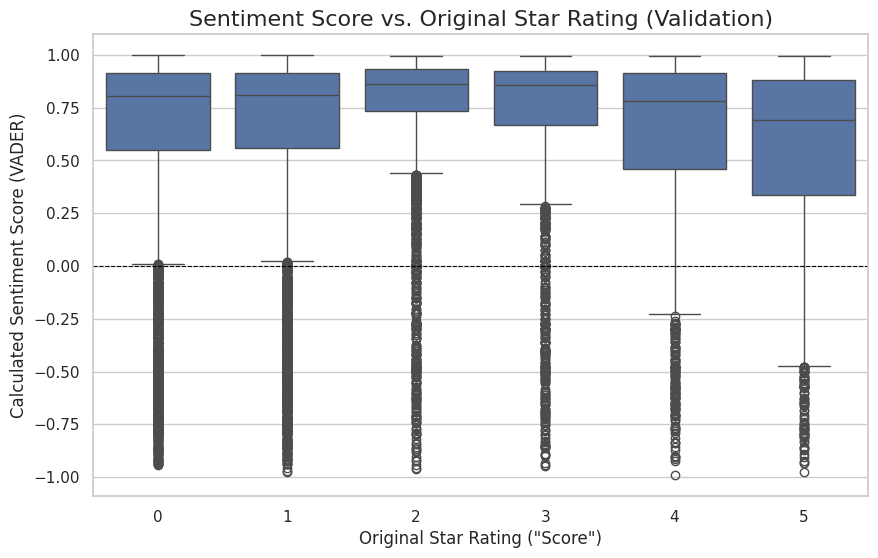

Boxplot created


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generating validation boxplot...")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='Score',          # The original 1-5 star rating
    y='sentiment_score',  # Our new -1 to +1 sentiment score
    data=master_df        # Our master DataFrame
)
ax.axhline(0, color='black', lw=0.8, linestyle='--') #black line for neutral
ax.set_title('Sentiment Score vs. Original Star Rating (Validation)', fontsize=16)
ax.set_xlabel('Original Star Rating ("Score")', fontsize=12)
ax.set_ylabel('Calculated Sentiment Score (VADER)', fontsize=12)

plt.show()
print("Boxplot created")

**Analysis Plan**

Now that I have the sentiment scores and have successfully validated them, it’s time to begin my main analysis, finding out why certain reviews are negative.

Iwill analyze my sentiment_score against three key factors:

1.   Product Category – Do certain categories (like pants or shoes) receive more negative reviews?
2.   User Location – Are reviewers from certain states (like Florida or Texas) giving more negative feedback?
3.   Product Price – Are cheaper products rated more negatively, or is the opposite true, do expensive products receive more criticism?

**Insight 1: Sentiment vs. Product Category**

Now that I fully trust our sentiment_score, I can start extracting my first insight.
I will investigate whether certain product categories receive more positive or negative feedback compared to others.
Here’s the plan:

*   Calculate the average (mean) sentiment score for each product category.
*   Sort these average scores.
*   Identify and display the bottom 5 categories (with the lowest scores) and the top 5 categories (with the highest scores).
*   Create a bar plot to clearly visualize the difference between the Top 5 and Bottom 5 categories.

Analyzing sentiment by product category...

--- Top 5 WORST Categories (Lowest Avg. Sentiment) ---
category
fleece jackets          -0.812700
view all graphic tees   -0.401900
all fine jewelry        -0.354900
comfort sneakers        -0.325200
sandals $30-$40         -0.079767
Name: sentiment_score, dtype: float64

--- Top 5 BEST Categories (Highest Avg. Sentiment) ---
category
track-arm             0.9665
decorative objects    0.9693
games & puzzles       0.9701
extra wide widths     0.9735
armitron              0.9804
Name: sentiment_score, dtype: float64

Generating bar plot...


/tmp/ipython-input-3638858027.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


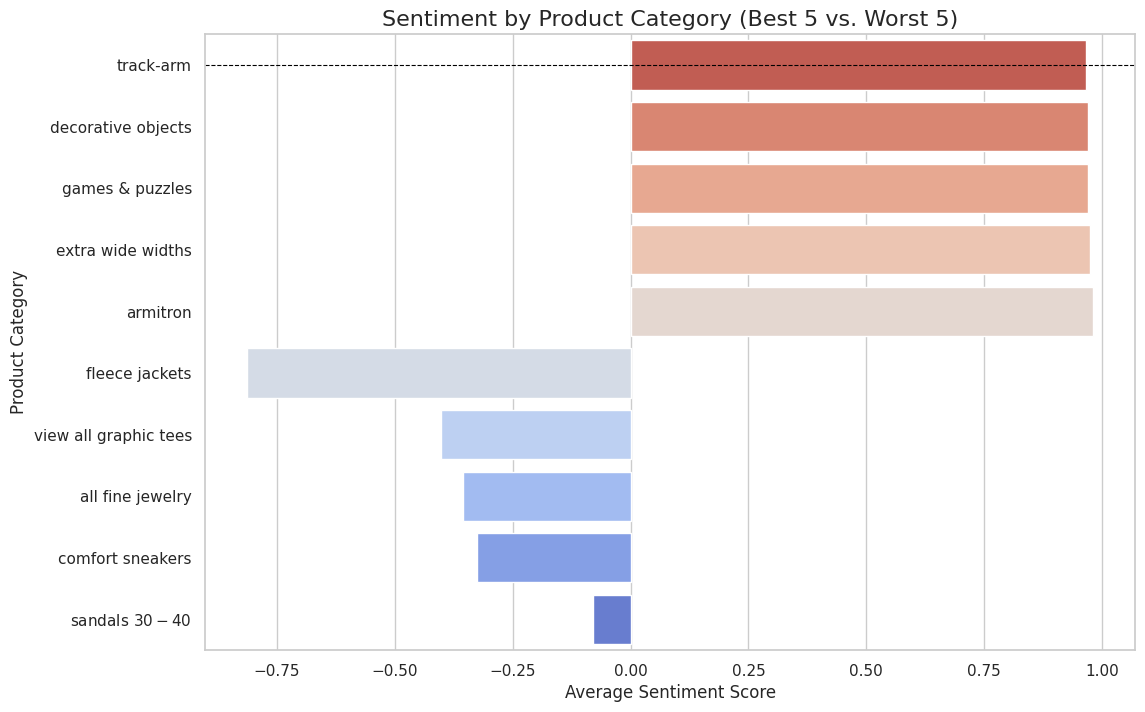

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

try:
    if 'master_df' not in globals():
        raise NameError("'master_df' is not defined.")

    print("Analyzing sentiment by product category...")

    # --- 1. Calculate average sentiment for each category ---
    category_sentiment = master_df.groupby('category')['sentiment_score'].mean().sort_values()

    # --- 2. Print the worst 5 categories ---
    print("\n--- Top 5 WORST Categories (Lowest Avg. Sentiment) ---")
    print(category_sentiment.head(5))

    # --- 3. Print the best 5 categories ---
    print("\n--- Top 5 BEST Categories (Highest Avg. Sentiment) ---")
    print(category_sentiment.tail(5))


    # --- 4. Create a DataFrame for plotting (Best 5 vs Worst 5) ---
    top_5 = category_sentiment.tail(5).reset_index(name='Average Sentiment')
    top_5['Type'] = 'Best 5'

    bottom_5 = category_sentiment.head(5).reset_index(name='Average Sentiment')
    bottom_5['Type'] = 'Worst 5'

    # Combine them into one DataFrame for plotting
    plot_data = pd.concat([top_5, bottom_5])


    # --- 5. Create the Bar Plot ---
    print("\nGenerating bar plot...")
    plt.figure(figsize=(12, 8))

    # We use 'category' on the y-axis
    # and 'Average Sentiment' on the x-axis
    ax = sns.barplot(
        x='Average Sentiment',
        y='category',
        data=plot_data,
        palette='coolwarm_r' # Red = Worst, Blue = Best
    )

    # Add a black line at 0.0 (Neutral)
    ax.axhline(0, color='black', lw=0.8, linestyle='--')

    ax.set_title('Sentiment by Product Category (Best 5 vs. Worst 5)', fontsize=16)
    ax.set_xlabel('Average Sentiment Score', fontsize=12)
    ax.set_ylabel('Product Category', fontsize=12)

    plt.savefig('category_sentiment_plot.png')
    plt.show()

except NameError:
    print("--- ERROR ---")
    print("`master_df` not found in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


**Insight 2: Sentiment vs. User Location (Top 10 Most Common)**

In the previous step, we analyzed the best and worst sentiment across different states.
Now, I will focus on JCPenney’s largest markets.

Here’s what I will do:


*   From master_df, identify the Top 10 states that have the highest number of reviews.
*   Calculate the average sentiment score for these 10 states.
*   Compare their sentiment levels with each other.

This analysis will help me to understand how my most important customers, those from the largest markets, feel about JCPenney.

Analyzing sentiment for Top 10 Most Common States...

--- Top 10 Most Common States (by review count) ---
Index(['Massachusetts', 'Kentucky', 'Delaware', 'Vermont', 'New Jersey',
       'Northern Mariana Islands', 'Oklahoma', 'New Mexico', 'Alaska',
       'Oregon'],
      dtype='object', name='State_x')

--- Average Sentiment for these Top 10 States (sorted) ---
State_x
New Mexico                  0.640188
Vermont                     0.644060
Oregon                      0.655752
Delaware                    0.659426
New Jersey                  0.660503
Alaska                      0.662884
Oklahoma                    0.666924
Northern Mariana Islands    0.673515
Massachusetts               0.676352
Kentucky                    0.690082
Name: sentiment_score, dtype: float64

Generating bar plot...


/tmp/ipython-input-2776025644.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


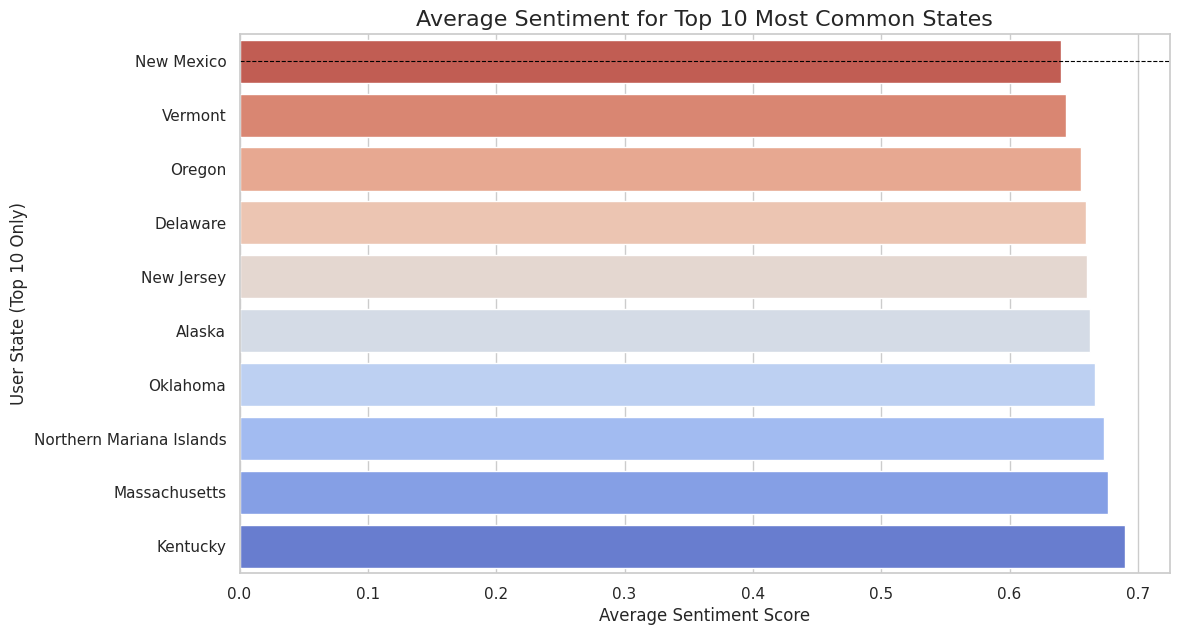

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

try:
    # 1. Check if master_df exists
    if 'master_df' not in globals():
        raise NameError("'master_df' is not defined.")

    print("Analyzing sentiment for Top 10 Most Common States...")

    # --- 1. Find the Top 10 most common locations (FIXED: using 'State_x') ---
    top_10_locations = master_df['State_x'].value_counts().head(10).index

    print("\n--- Top 10 Most Common States (by review count) ---")
    print(top_10_locations)

    # --- 2. Filter my DataFrame to only include these 10 states (FIXED: using 'State_x') ---
    top_10_df = master_df[master_df['State_x'].isin(top_10_locations)]

    # --- 3. Calculate average sentiment for only these 10 states (FIXED: using 'State_x') ---
    location_sentiment = top_10_df.groupby('State_x')['sentiment_score'].mean().sort_values()

    print("\n--- Average Sentiment for these Top 10 States (sorted) ---")
    print(location_sentiment)


    # --- 4. Create a DataFrame for plotting ---
    location_sentiment_df = location_sentiment.reset_index(name='Average Sentiment')
    # Let's rename 'State_x' back to 'State' just for the plot's label
    location_sentiment_df.rename(columns={'State_x': 'State'}, inplace=True)


    # --- 5. Create the Bar Plot (FIXED: y='State') ---
    print("\nGenerating bar plot...")
    plt.figure(figsize=(12, 7))

    ax = sns.barplot(
        x='Average Sentiment',
        y='State',
        data=location_sentiment_df,
        palette='coolwarm_r' # Red = Worst, Blue = Best
    )

    # Add a black line at 0.0 (Neutral)
    ax.axhline(0, color='black', lw=0.8, linestyle='--')

    ax.set_title('Average Sentiment for Top 10 Most Common States', fontsize=16)
    ax.set_xlabel('Average Sentiment Score', fontsize=12)
    ax.set_ylabel('User State (Top 10 Only)', fontsize=12)

    plt.savefig('top_10_location_sentiment_plot.png')
    plt.show()

except NameError:
    print("--- ERROR ---")
    print("`master_df` not found in memory.")
except KeyError:
    print("--- ERROR ---")
    print("KeyError: 'State_x' not found.")
    print("Please go back and re-run all cells from 'Load the Data Files' to 'Create the Final Master DataFrame'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



**Insight 3: Sentiment vs. Product Price**

This is my final analysis, I will explore whether a product’s price influences customer sentiment.
(Do customers give more negative reviews for cheaper items, or for more expensive ones?)
I will use the sale_price column for this analysis.
Here’s the plan:

1.   Clean and convert the sale_price column from text to a numeric (float) format.
2.   Create price groups (bins) — for example, "$0–25", "$25–50", and so on.
3.   Calculate the average sentiment score for each price group.
4.   Visualize the results using a bar plot to see how sentiment changes across different price ranges.

--- Step 1: Cleaning Price Column ---
Dropped 1726 rows due to invalid price.
New data type of 'sale_price_numeric': float64
Price column has been cleaned.

--- Step 2: Creating Plot ---
Grouping prices into bins...

--- Average Sentiment for each Price Group ---
  price_group  sentiment_score
0       $0-25         0.688791
1      $25-50         0.677305
2      $50-75         0.658651
3     $75-100         0.691368
4    $100-150         0.658951
5    $150-250         0.672609
6    $250-500         0.626773
7       $500+         0.553991

Generating bar plot...


/tmp/ipython-input-2392597387.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sentiment = master_df.groupby('price_group')['sentiment_score'].mean().reset_index()
/tmp/ipython-input-2392597387.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


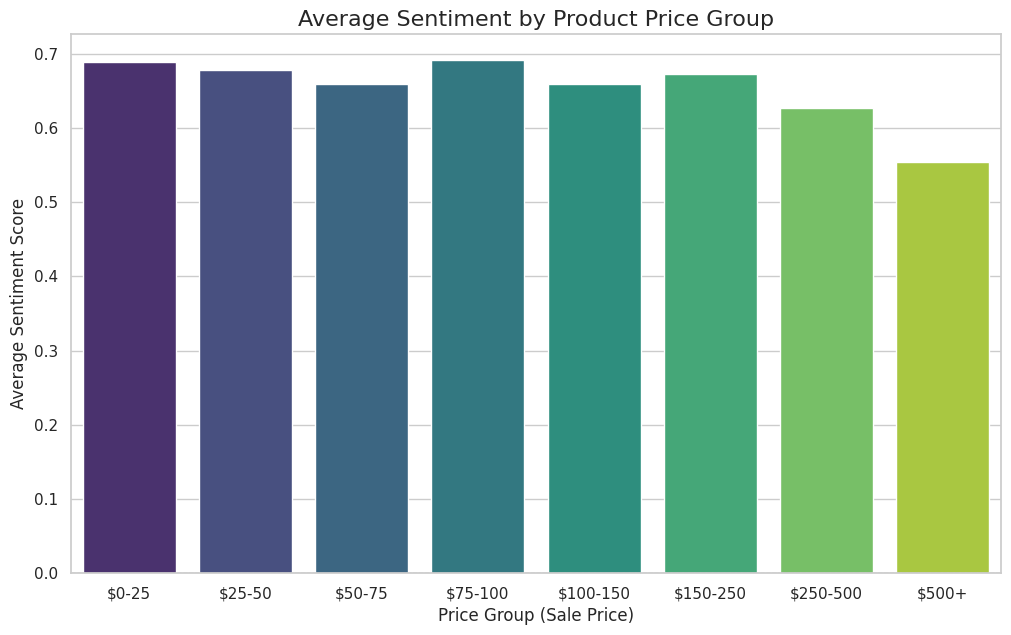

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # 1. Check if master_df exists
    if 'master_df' not in globals():
        raise NameError("'master_df' is not defined.")

    print("--- Step 1: Cleaning Price Column ---")

    # --- 1a. Convert 'sale_price' to a number (float) ---
    master_df['sale_price_numeric'] = pd.to_numeric(master_df['sale_price'], errors='coerce')

    # --- 1b. Drop rows where price could not be converted ---
    initial_rows = len(master_df)
    master_df.dropna(subset=['sale_price_numeric'], inplace=True)
    final_rows = len(master_df)

    print(f"Dropped {initial_rows - final_rows} rows due to invalid price.")
    print(f"New data type of 'sale_price_numeric': {master_df['sale_price_numeric'].dtype}")
    print("Price column has been cleaned.")


    print("\n--- Step 2: Creating Plot ---")
    print("Grouping prices into bins...")

    # --- 2a. Define the price bins (groups) ---
    bins = [0, 25, 50, 75, 100, 150, 250, 500, float('inf')]
    labels = ['$0-25', '$25-50', '$50-75', '$75-100', '$100-150', '$150-250', '$250-500', '$500+']

    # --- 2b. Create a new 'price_group' column ---
    master_df['price_group'] = pd.cut(
        master_df['sale_price_numeric'],
        bins=bins,
        labels=labels,
        right=False
    )

    # --- 2c. Calculate average sentiment for each price group ---
    price_sentiment = master_df.groupby('price_group')['sentiment_score'].mean().reset_index()

    print("\n--- Average Sentiment for each Price Group ---")
    print(price_sentiment)


    # --- 2d. Create the Bar Plot ---
    print("\nGenerating bar plot...")
    plt.figure(figsize=(12, 7))

    ax = sns.barplot(
        x='price_group',
        y='sentiment_score',
        data=price_sentiment,
        palette='viridis' # one different color palette
    )

    # Add a black line at 0.0 (Neutral)
    ax.axhline(0, color='black', lw=0.8, linestyle='--')

    ax.set_title('Average Sentiment by Product Price Group', fontsize=16)
    ax.set_xlabel('Price Group (Sale Price)', fontsize=12)
    ax.set_ylabel('Average Sentiment Score', fontsize=12)

    plt.savefig('price_sentiment_plot.png')
    plt.show()

except NameError:
    print("--- ERROR ---")
    print("`master_df` not found in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

